<a href="https://colab.research.google.com/github/Hamza1407/AnalyseTemp/blob/main/Copie_de_Files_d'attentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Création d'un simulateur à évènements discret à temps continu

Création de la liste des arrivées

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Création des fonctions Exponentielle et Poisson servant à définir les listes d'arrivées et de services

In [2]:
# liste de n valeurs distribuées suivant une loi Exponentielle de paramètre lambda
def loi_exponentielle(n, lmbda):
  y = np.random.uniform(0, 1, n)
  x = [-np.log(1 - y[i]) / lmbda for i in range(len(y))]
  return x


# liste de n valeurs distribuées suivant une loi de Poisson de paramètre lambda
def loi_Poisson(n, lmbda):
  duree_inter_evt = loi_exponentielle(n-1, lmbda)
  dates_evt = [0] * n
  for c in range(1,n):
    dates_evt[c] = dates_evt[c-1] + duree_inter_evt[c-1]
  return dates_evt

Modèle MM1

In [3]:
# Calcul de la liste des sorties
def mm1(arrivees, services):
  n = len(arrivees)
  sorties = [arrivees[0] + services[0]]
  for i in range(1, n):
    if sorties[i - 1] > arrivees[i]:
      sorties.append(sorties[i - 1] + services[i])
    else:
      sorties.append(arrivees[i] + services[i])
  return sorties

Modèle MM1K

In [13]:
#Calcul des dates de sorties en fonction des dates d'arrivées, des temps de services, et du nombre K de clients dans le système avant de devoir refuser des entrées
def mm1K(arrivees, services, K):

  arrivees_reelles = arrivees[:K] #Liste des temps d'arrivées des personnes qui ont vraiment pu entrer
  n = len(arrivees)
  sorties = [arrivees[0] + services[0]]
  clients_rejetes=[0]*K

  for i in range (1, K): #Calcul des K premières sorties (car K = client en service + capacité de la file d'attente)
    if sorties[-1] > arrivees[i]:
      sorties.append(sorties[-1] + services[i])
    else:
      sorties.append(arrivees[i] + services[i])

  c = 0 #Compteur du nombre de personnes rejetées
  for i in range(K, n):
    if sorties[-K]<arrivees[i] : # Test sur les entrées dans la file : Il faut que la personne K places devant soit sortie pour qu'une nouvelle personne puisse entrer
      arrivees_reelles.append(arrivees[i]) #Si la condition est respectée : Ajout du nouveau client à la liste des entrées réelles
      if sorties[-1] > arrivees[i]:
        sorties.append(sorties[-1] + services[i])
      else:
        sorties.append(arrivees[i] + services[i])
    else :
      c = c+1
    clients_rejetes.append(c)
      #print("c : ",c)
  return arrivees_reelles, sorties,clients_rejetes

In [26]:
np.random.seed(2023)

  # 1000 clients pour la simulation
nb_clients = 1000
  # En moyenne 3 clients arrivent par heure => lmdba = 3 clients/h : C'est le nombre de clients qui arrivent par unité de temps
lmbda = 3
  # Un client est traité en moyenne en 15 minutes = espérence de la loi Exponentielle : E(service) = 1/mu = 1/4 heure
mu = 4

k=5

  # liste des date d'arrivées des clients dans la file d'attente
arrivees = loi_Poisson(nb_clients, lmbda)
print("liste des arrivées : ",arrivees)

  # liste des durées de traitement pour chaque client dans l'ordre par les serveurs
services = loi_exponentielle(nb_clients, mu)
print("liste des services : ",services)

liste des arrivées :  [0, 0.12953024681374128, 0.8665711726627681, 1.162190763094211, 1.2073098181593511, 1.258104374242512, 1.4684095588337045, 1.475855322732447, 1.9089520773643032, 2.1566692441275315, 2.4191077567524744, 2.622271892791429, 2.8542437388769595, 3.021459999350082, 3.076093019927255, 3.225311520837687, 3.2842545462907027, 3.421730322223901, 3.4880120759865325, 3.6533197065642122, 3.6654194145557217, 3.9427831645546765, 4.018609765929782, 4.1474603607487825, 4.304963299758838, 4.372765725258234, 4.4093527630520715, 4.611631416483008, 4.684293639079148, 4.842847063753151, 5.731809889736686, 6.2077372393499965, 6.698738664402014, 7.001430650719151, 7.524229800193517, 8.078400913338475, 9.391827507437775, 10.112146686071267, 10.150916814969856, 10.721981092504908, 10.84451778344245, 10.94556010193223, 11.119030319971737, 11.387742846045471, 11.715154206771215, 11.742499192913305, 12.93774076745057, 13.114359880996115, 13.540669117979931, 13.90351104142167, 13.98557392222813

In [27]:
sortie_mm1k=mm1K(arrivees,services,k)
print("liste des arrivée mm1k : ",sortie_mm1k[0])
print("liste des sorties mm1k : ",sortie_mm1k[1])
print("liste du cumul de nombre de clients rejetés : ",sortie_mm1k[2])


liste des arrivée mm1k :  [0, 0.12953024681374128, 0.8665711726627681, 1.162190763094211, 1.2073098181593511, 1.258104374242512, 1.4684095588337045, 1.475855322732447, 1.9089520773643032, 2.1566692441275315, 2.4191077567524744, 2.622271892791429, 2.8542437388769595, 3.021459999350082, 3.076093019927255, 3.225311520837687, 3.2842545462907027, 3.421730322223901, 3.4880120759865325, 3.6533197065642122, 3.6654194145557217, 3.9427831645546765, 4.1474603607487825, 4.304963299758838, 4.4093527630520715, 4.611631416483008, 4.684293639079148, 4.842847063753151, 5.731809889736686, 6.2077372393499965, 6.698738664402014, 7.001430650719151, 7.524229800193517, 8.078400913338475, 9.391827507437775, 10.112146686071267, 10.150916814969856, 10.721981092504908, 10.84451778344245, 10.94556010193223, 11.119030319971737, 11.387742846045471, 11.715154206771215, 11.742499192913305, 12.93774076745057, 13.114359880996115, 13.540669117979931, 13.90351104142167, 13.985573922228138, 14.05465272713008, 14.490824733

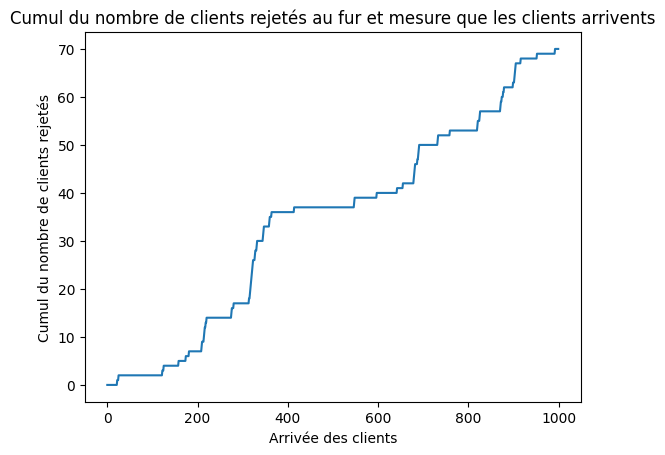

In [28]:
plt.plot(range(len(sortie_mm1k[2])), sortie_mm1k[2])
plt.xlabel("Arrivée des clients")
plt.ylabel("Cumul du nombre de clients rejetés")
plt.title("Cumul du nombre de clients rejetés au fur et mesure que les clients arrivents")
plt.show()

In [30]:
def mm1k_queue_size(arrivee_mm1k, sorties_mm1k):
  queue=[0]
  for i in range(0,len(arrivee_mm1k)):
    j=i-1
    compteur=1
    while j>=0 and arrivee_mm1k[i]<sorties_mm1k[j]:
      j=j-1
      compteur+=1
    queue.append(compteur)
  return queue


In [33]:
taille_queue=mm1k_queue_size(sortie_mm1k[0],sortie_mm1k[1])
print("Evolution de la taille de la queue ",taille_queue)


Evolution de la taille de la queue  [0, 1, 2, 1, 1, 2, 2, 3, 4, 5, 4, 3, 2, 2, 2, 3, 4, 5, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 4, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 2, 3, 4, 5, 3, 4, 5, 1, 2, 2, 3, 1, 1, 1, 2, 2, 2, 3, 1, 2, 3, 1, 1, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 5, 4, 3, 4, 4, 2, 2, 3, 4, 4, 2, 3, 4, 1, 2, 3, 1, 2, 3, 4, 4, 5, 5, 5, 3, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 3, 3, 1, 1, 2, 2, 3, 4, 3, 4, 5, 5, 5, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 4, 5, 4, 3, 3, 4, 5, 5, 4, 4, 4, 3, 1, 2, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 4, 4, 5, 4, 5, 3, 4, 5, 5, 5, 3, 1, 2, 3, 4, 4, 5, 4, 3, 2, 2, 3, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 4, 3, 4, 3, 3, 4, 5, 4, 5, 3, 3, 4, 5, 4, 4, 5, 4, 4, 5, 5, 1, 1, 2, 3, 4, 3, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 3, 4, 5, 3, 4, 5, 5, 4, 5, 5, 5, 5, 5, 1, 1, 2, 3, 3, 4, 4, 5, 4, 5, 5, 4, 1, 1, 1, 2, 

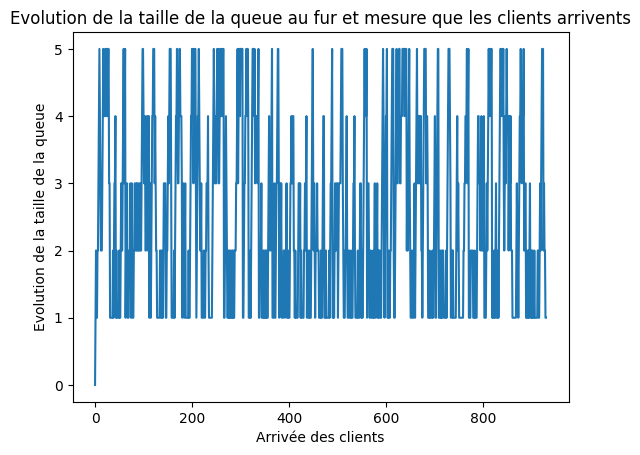

In [34]:
plt.plot(range(len(taille_queue)), taille_queue)
plt.xlabel("Arrivée des clients")
plt.ylabel("Evolution de la taille de la queue")
plt.title("Evolution de la taille de la queue au fur et mesure que les clients arrivents")
plt.show()

Modèle MMC

In [ ]:
#Calcul des dates de sorties en fonction des dates d'arrivées, des temps de services, et du nombre de serveurs disponibles
def mmc(arrivees, services, c):
    n = len(arrivees)
    sorties = []
    fin_de_service = [0] * c  # Création d'une liste regroupant les fins de service des c serveurs

    for i in range(0, c):  # On calcule les c premières sorties car les clients seront pris par les c serveurs
        sorties.append(arrivees[i] + services[i])
        fin_de_service[i] = arrivees[i] + services[i]

    for i in range(c, n):
        if arrivees[i] < min(fin_de_service):
            min_index = fin_de_service.index(min(fin_de_service))
            sorties.append(min(fin_de_service) + services[i])  # Le temps de sortie dépend de la libération d'un des serveurs
            fin_de_service[min_index] = min(fin_de_service) + services[i]  # On met à jour la liste fin de service
        else:
            sorties.append(arrivees[i] + services[i])
            min_index = fin_de_service.index(min(fin_de_service))
            fin_de_service[min_index] = arrivees[i] + services[i]

    return sorties

Calcul des métriques des performances de la file MM1

In [ ]:
# Calcul de la liste des temps d'attente
def temps_attente(arrivees, services, sorties):
  return [sorties[i] - services[i] - arrivees[i] for i in range(len(arrivees))]

def w_q(attentes):
  return np.array(attentes).mean()

def w_s(services):
  return np.array(services).mean()

def w(arrivees, sorties):
  temps_system = [sorties[i] - arrivees[i] for i in range(len(arrivees))]
  return np.array(temps_system).mean()

def nb_clients_en_moyenne(arrivees, sorties):
  tps_system_client = [sorties[i] - arrivees[i] for i in range(len(arrivees))]
  duree_simulation = sorties[-1]
  duree_totale_clients = 0
  for i in range(len(arrivees)):
    duree_totale_clients += tps_system_client[i]
  return duree_totale_clients / duree_simulation

def nb_clients_en_service(sorties, services):
  duree_simulation = sorties[-1]
  duree_totale_service = 0
  for i in range(len(services)):
    duree_totale_service += services[i]
  return duree_totale_service / duree_simulation


def nb_clients_en_attente(arrivees, sorties, services):
  duree_simulation = sorties[-1]
  attentes = temps_attente(arrivees, services, sorties)
  cumul_attentes = 0
  for i in range(len(arrivees)):
    cumul_attentes += attentes[i]
  return cumul_attentes / duree_simulation

Calcul de la probabilité qu'il y ait n clients dans le système

In [ ]:
def pmm1 (n):
  i = 0
  for k in range(n, nb_clients):
    if arrivees[k] > sorties[k - (n + 1)]:
      i = i + 1
  p = i/nb_clients
  if n > 0 :
    for j in range(n):
      p = p - pmm1(j)
  return p

Fonction MAIN

In [5]:
if __name__ == '__main__':

  np.random.seed(2023)

  # 1000 clients pour la simulation
  nb_clients = 1000
  # En moyenne 3 clients arrivent par heure => lmdba = 3 clients/h : C'est le nombre de clients qui arrivent par unité de temps
  lmbda = 3
  # Un client est traité en moyenne en 15 minutes = espérence de la loi Exponentielle : E(service) = 1/mu = 1/4 heure
  mu = 4

  # liste des date d'arrivées des clients dans la file d'attente
  arrivees = loi_Poisson(nb_clients, lmbda)
  print("liste des arrivées : ",arrivees)

  # liste des durées de traitement pour chaque client dans l'ordre par les serveurs
  services = loi_exponentielle(nb_clients, mu)
  print("liste des services : ",services)

#MM1

"""
  sorties = mm1(arrivees, services)
  attentes = temps_attente(arrivees, services, sorties)
  # print("liste des arrivées : ", arrivees)
  # print("liste des services : ", services)
  # print("liste des sorties : ", sorties)
  # print("liste des attentes : ", attentes)

"""

"""
  # Tracé des temps d'attente

  plt.plot(attentes)
  plt.xlabel("numero client")
  plt.ylabel("temps")
  plt.title("temps de sortie et temps d'attente")
  plt.show()

  Wq = w_q(attentes)
  print("Wq = ", Wq)

  Ws = w_s(services)
  print("Ws = ", Ws)

  W = w(arrivees, sorties)
  print("W = ", W)
  L = nb_clients_en_moyenne(arrivees, sorties)
  print("L = ", L)
  Ls = nb_clients_en_service(sorties, services)
  print("Ls = ", Ls)
  Lq = nb_clients_en_attente(arrivees, sorties, services)
  print("Lq = ", Lq)

  print("p0 = ", pmm1(0))
  print("p1 = ", pmm1(1))
  print("p2 = ", pmm1(2))
  print("p3 = ", pmm1(3))

  print("Proba que quelqu'un attende = ", 1-pmm1(0))
"""

#MM1K


arrivees_reelles, sorties = mm1K(arrivees, services, 3)
print("arrivées réelles : ", arrivees_reelles)
#attentes = temps_attente(arrivees, services, sorties)

print(len(arrivees)/sorties[-1])
print(len(sorties)/sorties[-1])
print((len(arrivees)-len(sorties))/sorties[-1])

"""
#MMC

sorties = mmc(arrivees, services, 2)
print("sorties : ", sorties)
"""

liste des arrivées :  [0, 0.12953024681374128, 0.8665711726627681, 1.162190763094211, 1.2073098181593511, 1.258104374242512, 1.4684095588337045, 1.475855322732447, 1.9089520773643032, 2.1566692441275315, 2.4191077567524744, 2.622271892791429, 2.8542437388769595, 3.021459999350082, 3.076093019927255, 3.225311520837687, 3.2842545462907027, 3.421730322223901, 3.4880120759865325, 3.6533197065642122, 3.6654194145557217, 3.9427831645546765, 4.018609765929782, 4.1474603607487825, 4.304963299758838, 4.372765725258234, 4.4093527630520715, 4.611631416483008, 4.684293639079148, 4.842847063753151, 5.731809889736686, 6.2077372393499965, 6.698738664402014, 7.001430650719151, 7.524229800193517, 8.078400913338475, 9.391827507437775, 10.112146686071267, 10.150916814969856, 10.721981092504908, 10.84451778344245, 10.94556010193223, 11.119030319971737, 11.387742846045471, 11.715154206771215, 11.742499192913305, 12.93774076745057, 13.114359880996115, 13.540669117979931, 13.90351104142167, 13.98557392222813

'\n#MMC\n\nsorties = mmc(arrivees, services, 2)\nprint("sorties : ", sorties)\n'